In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import numpy as np
import pandas as pd
import pickle
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,BatchNormalization
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

label_dict={0:"T-shirt",1:"Trouser",2:"Pullover",3:"Dress",
            4:"Coat",5:"Sandal",6:"Shirt",
            7:"Sneaker",8:"Bag",9:"Ankle boot"}

print("The shape of train_images is ",train_images.shape)
print("The shape of train_labels is ",train_labels.shape)
print("The shape of test_images is ",test_images.shape)
print("The length of test_labels is ",len(test_labels))



The shape of train_images is  (60000, 28, 28)
The shape of train_labels is  (60000,)
The shape of test_images is  (10000, 28, 28)
The length of test_labels is  10000


In [3]:
x_train=train_images
x_test=test_images
y_train=train_labels
y_test=test_labels

In [4]:

train_images=train_images/255.0
test_images=test_images/255.0
#独热编码
train_labels_ohe=tf.one_hot(train_labels,depth=10).numpy()
test_labels_ohe=tf.one_hot(test_labels,depth=10).numpy()
#建立Sequential线性堆叠模型
model=tf.keras.models.Sequential()
#添加平坦层
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#添加隐藏层,自动生成正态分布的权值
model.add(tf.keras.layers.Dense(units=64,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(units=32,kernel_initializer='normal',activation='relu'))
#添加输出层
model.add(tf.keras.layers.Dense(10,activation='softmax'))
# model.summary()
#定义训练模式
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#设置优化器，定义交叉熵损失函数，评估模型的方式为准确率
#设置训练参数
train_epochs=19
batch_size=30
train_history=model.fit(train_images,train_labels_ohe,validation_split=0.2,epochs=train_epochs,batch_size=batch_size,verbose=2)
#可视化
# def show_train_history(train_history,train_metric,val_metric):
#     plt.plot(train_history.history[train_metric])
#     plt.plot(train_history.history[val_metric])
#     plt.title('Train History')
#     plt.ylabel(train_metric)
#     plt.xlabel('Epoch')
#     plt.show()
# show_train_history(train_history,'loss','val_loss')

Train on 48000 samples, validate on 12000 samples
Epoch 1/19
48000/48000 - 6s - loss: 0.5617 - accuracy: 0.8036 - val_loss: 0.4140 - val_accuracy: 0.8544
Epoch 2/19
48000/48000 - 4s - loss: 0.3924 - accuracy: 0.8594 - val_loss: 0.3918 - val_accuracy: 0.8595
Epoch 3/19
48000/48000 - 3s - loss: 0.3513 - accuracy: 0.8717 - val_loss: 0.3727 - val_accuracy: 0.8702
Epoch 4/19
48000/48000 - 3s - loss: 0.3283 - accuracy: 0.8791 - val_loss: 0.3527 - val_accuracy: 0.8734
Epoch 5/19
48000/48000 - 3s - loss: 0.3134 - accuracy: 0.8836 - val_loss: 0.3435 - val_accuracy: 0.8786
Epoch 6/19
48000/48000 - 3s - loss: 0.2983 - accuracy: 0.8894 - val_loss: 0.3285 - val_accuracy: 0.8816
Epoch 7/19
48000/48000 - 3s - loss: 0.2863 - accuracy: 0.8925 - val_loss: 0.3441 - val_accuracy: 0.8783
Epoch 8/19
48000/48000 - 3s - loss: 0.2798 - accuracy: 0.8956 - val_loss: 0.3488 - val_accuracy: 0.8759
Epoch 9/19
48000/48000 - 3s - loss: 0.2690 - accuracy: 0.8989 - val_loss: 0.3246 - val_accuracy: 0.8815
Epoch 10/19
48

In [5]:
#评估模型
test_loss,test_acc=model.evaluate(train_images,train_labels_ohe,verbose=2)
print('Test accuracy:',test_acc)

60000/60000 - 2s - loss: 0.2130 - accuracy: 0.9223
Test accuracy: 0.9223


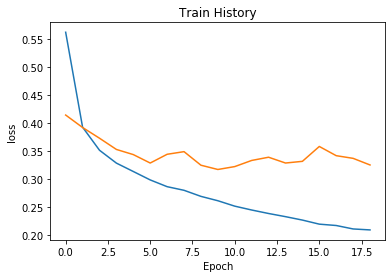

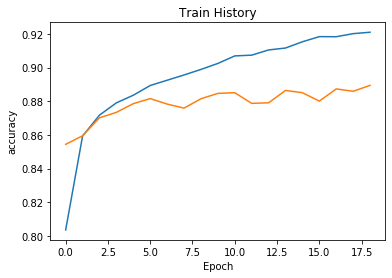

In [6]:
# 可视化
def show_train_history(train_history,train_metric,val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('Epoch')
    plt.show()
show_train_history(train_history,'loss','val_loss')
show_train_history(train_history,'accuracy','val_accuracy')

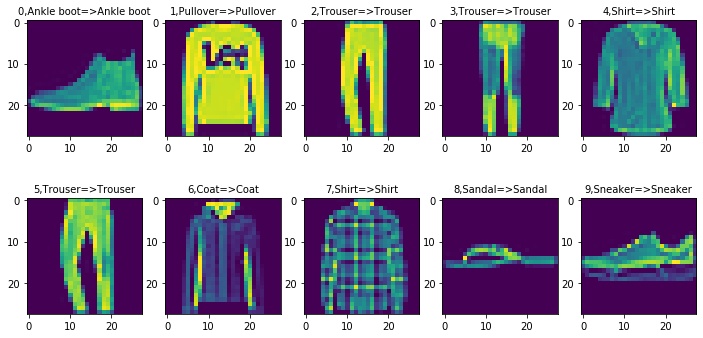

In [7]:
preds=model.predict_classes(x_test)
#定义显示图像数据及其对应标签的函数
#images：图片列表，labels：标签列表，preds:预测值列表，index:从第index个开始显示，num:缺省一次显示5幅

def plot_images_labels_prediction(images,labels,preds,index,num=5):
    fig=plt.gcf()#获取当前图标，Get Current Figure
    fig.set_size_inches(12,6)#1英寸等于2.54cm
    if num>10:
        num=10 #最多显示10个子图
    for i in range(0,num):
        ax=plt.subplot(2,5,i+1)#获取当前要处理的子图
        ax.imshow(images[index])
        title=str(i)+','+label_dict[labels[index]]#构建该图上要显示的title信息
        if len(preds)>0:
            title += '=>' + label_dict[preds[index]]
        ax.set_title(title,fontsize=10)#显示图上的title信息
        index += 1
    plt.show()
plot_images_labels_prediction(x_test,y_test,preds,0,10)

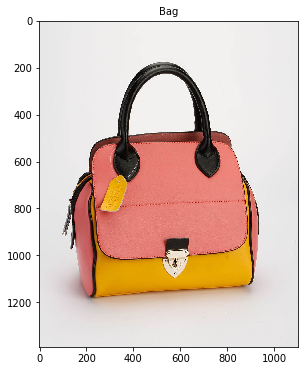

In [13]:
# 预测
from PIL import Image
# 预测
lena = Image.open('bag1.png')         #打开图片
lenad=Image.open('bag2.png')
lenaa = lena.resize((28, 28))  
lenaa=np.asarray(lenaa)
lenaa=np.array([lenaa])
preds=model.predict_classes(lenaa)


fig=plt.gcf()#获取当前图标，Get Current Figure
fig.set_size_inches(6,6)#1英寸等于2.54cm
ax=plt.subplot(1,1,1)#获取当前要处理的子图
ax.imshow(lenad)
title =  label_dict[preds[0]]
ax.set_title(title,fontsize=10)#显示图上的title信息
plt.show()